In [31]:
#Other
import h5py
import pandas as pd
import skimage.io
import os
import pathlib
import pickle
import tempfile
import skimage
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
import warnings
import time
import glob
import PIL
import re
import cv2
import json
import shutil
import getpass
import imageio.v2 as imageio

In [187]:
path = r"Z:\Data\@MiN\Sarah\Projects\EMBL_DLCourse\data\Training Data\Cell periphery"
filename = "C1--W00049--P00001--Z00000--T00000--Nuclei Objects.tif"

# Open Label Images
labelimage = imageio.imread(path+"/"+ filename)
labelimage = labelimage[500:1000, 500:1000]

In [188]:
type(labelimage)
labelimage.shape

(500, 500)

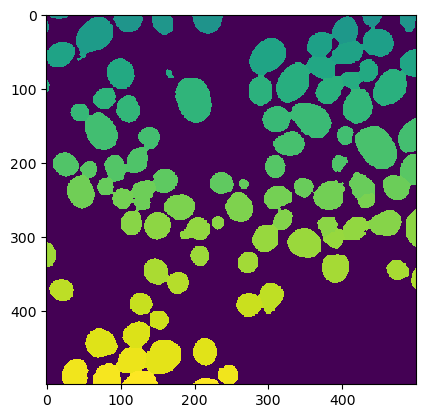

In [189]:
plt.imshow(labelimage)

In [190]:
labelimage.max()

404

In [168]:
from skimage.segmentation import find_boundaries, clear_border

In [107]:
import numpy.ma as ma

In [191]:
labelimage = clear_border(labelimage)

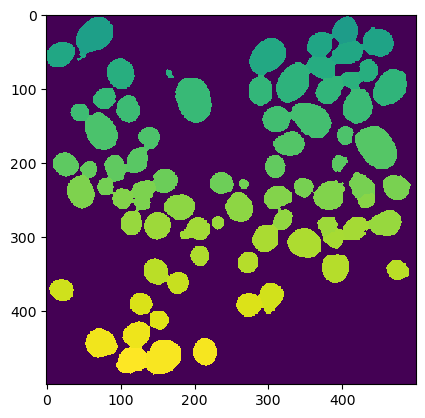

In [192]:
plt.imshow(labelimage)

In [257]:
contour_dict = {}
for i in range(1, labelimage.max()):
    mask_ = ma.equal(labelimage, i)
    if np.any(mask_):
        contour = measure.find_contours(mask_)
        #integer_edge_points = [np.round(np.array(points)).astype(float) for points in contour]
        contour_dict[i] = contour

In [258]:
len(contour_dict)

77

In [259]:
df_contour = pd.DataFrame.from_dict(contour_dict, orient="index")

In [268]:
df_contour

,0,1
216,"[[39.5, 400.0], [39.5, 399.0], [39.5, 398.0], ...",None
221,"[[55.5, 53.0], [55.0, 52.5], [54.5, 52.0], [54...",None
228,"[[57.5, 455.0], [57.5, 454.0], [57.5, 453.0], ...",None
230,"[[57.5, 377.0], [57.5, 376.0], [57.5, 375.0], ...",None
233,"[[68.5, 391.0], [68.0, 390.5], [67.0, 390.5], ...",None
...,...,...
375,"[[426.5, 156.0], [426.5, 155.0], [426.5, 154.0...",None
382,"[[450.5, 128.0], [450.5, 127.0], [450.5, 126.0...",None
384,"[[464.5, 70.0], [464.5, 69.0], [464.0, 68.5], ...",None
386,"[[475.5, 217.0], [475.5, 216.0], [475.5, 215.0...",None


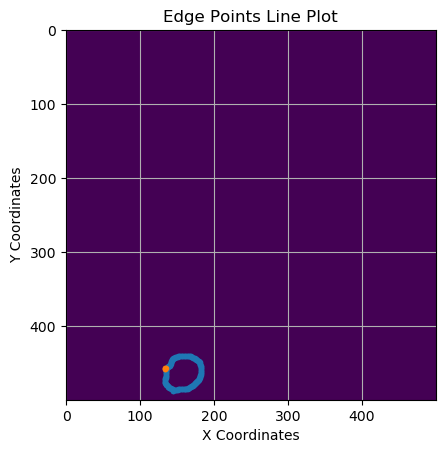

In [262]:
plt.figure()
plt.imshow(mask_)
for points in contour_dict[388]:
# Extract x and y coordinates from the edge points
    x_coords = [point[1] for point in points]
    y_coords = [point[0] for point in points]
    plt.plot(x_coords, y_coords, marker='.', linestyle='-', linewidth=0.2)

# Create a line plot

plt.title('Edge Points Line Plot')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.grid(True)
plt.show()